## Data Mining
#### Project 3
#### Team 7A

### Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from scipy import stats

### Load Dataset

In [3]:
df = pd.read_excel('1952.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'


### Exploratory Analysis

In [4]:
df.head(10)

,CaseID$,CNAME,STCODE,CCODE,TOTPOP,TOTMEMB,TOTCHUR,SDA_M,SDA_C,AOG_M,...,UCHRC_M,UCHRC_C,UCA_M,UCA_C,VEDS_M,VEDS_C,VLNTR_M,VLNTR_C,CGP_M,CGP_C
0,33,"Hale, AL",1,65,20832,5145,52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,"Henry, AL",1,67,18674,4773,31,0,0,23,...,0,0,0,0,0,0,0,0,0,0
2,35,"Houston, AL",1,69,46522,19420,88,87,2,379,...,0,0,0,0,0,0,0,0,0,0
3,36,"Jackson, AL",1,71,38998,9030,82,110,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,"Jefferson, AL",1,73,558928,212326,595,991,4,648,...,0,0,0,0,0,0,0,0,454,11
5,38,"Lamar, AL",1,75,16441,5064,58,0,0,44,...,0,0,0,0,0,0,0,0,0,0
6,39,"Lauderdale, AL",1,77,54179,16374,83,13,1,12,...,0,0,0,0,0,0,0,0,23,1
7,40,"Lawrence, AL",1,79,27128,6488,45,0,0,0,...,0,0,0,0,0,0,0,0,39,1
8,41,"Lee, AL",1,81,45073,12834,53,0,0,44,...,0,0,0,0,0,0,0,0,0,0
9,42,"Limestone, AL",1,83,35766,10445,62,40,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,CaseID$,STCODE,CCODE,TOTPOP,TOTMEMB,TOTCHUR,SDA_M,SDA_C,AOG_M,AOG_C,...,UCHRC_M,UCHRC_C,UCA_M,UCA_C,VEDS_M,VEDS_C,VLNTR_M,VLNTR_C,CGP_M,CGP_C
count,3075.000000,3075.000000,3075.000000,3.075000e+03,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,...,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,1538.000000,30.373984,96.128130,4.898718e+04,2.410584e+04,59.465366,82.131382,0.909268,149.351545,2.323252,...,0.196098,0.004553,24.440650,0.126504,0.250081,0.003577,2.415285,0.029593,9.402276,0.321951
std,887.820365,14.885946,86.417379,1.698913e+05,9.496974e+04,80.284820,378.736159,1.873668,451.966070,4.806493,...,8.026282,0.178492,180.604247,0.774888,6.602840,0.064932,21.154163,0.229782,29.639316,0.845838
min,1.000000,1.000000,1.000000,5.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,769.500000,19.000000,35.000000,1.000850e+04,4.006500e+03,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1538.000000,29.000000,77.000000,1.876000e+04,7.905000e+03,42.000000,0.000000,0.000000,41.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2306.500000,45.000000,131.000000,3.584500e+04,1.589350e+04,68.000000,53.500000,1.000000,137.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3075.000000,56.000000,510.000000,4.508792e+06,2.685524e+06,1939.000000,15072.000000,59.000000,10142.000000,138.000000,...,417.000000,9.000000,4404.000000,16.000000,269.000000,2.000000,655.000000,5.000000,454.000000,11.000000


In [6]:
df.shape

(3075, 235)

### Data Cleaning

First we checked for missing and duplicate values but we did not find anything. 

In [7]:
for i in df.columns:
    no_missing = df[i].isnull().sum()
    if no_missing > 0:
        print(i)
        print(no_missing)
    else:
        print(i)
        print("No missing values")
        print(' ')

CaseID$
No missing values
 
CNAME
No missing values
 
STCODE
No missing values
 
CCODE
No missing values
 
TOTPOP
No missing values
 
TOTMEMB
No missing values
 
TOTCHUR
No missing values
 
SDA_M
No missing values
 
SDA_C
No missing values
 
AOG_M
No missing values
 
AOG_C
No missing values
 
ABC_M
No missing values
 
ABC_C
No missing values
 
SBC_M
No missing values
 
SBC_C
No missing values
 
COB_M
No missing values
 
COB_C
No missing values
 
COGT_M
No missing values
 
COGT_C
No missing values
 
COGI_M
No missing values
 
COGI_C
No missing values
 
CGC_M
No missing values
 
CGC_C
No missing values
 
NAZRN_M
No missing values
 
NAZRN_C
No missing values
 
CCC_M
No missing values
 
CCC_C
No missing values
 
DOCIC_M
No missing values
 
DOCIC_C
No missing values
 
ARAPO_M
No missing values
 
ARAPO_C
No missing values
 
GRKAD_M
No missing values
 
GRKAD_C
No missing values
 
ERC_M
No missing values
 
ERC_C
No missing values
 
EUBC_M
No missing values
 
EUBC_C
No missing values
 
JEWS_M
N

In [8]:
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
3070    False
3071    False
3072    False
3073    False
3074    False
Length: 3075, dtype: bool

Then we checked if the total number of churches and of members agrees with the sum of the respective features and if it did not, we changed TOTCHR and TOTMEMB to the count we computed from the give data.

In [9]:
def check_totcols(df, tot, s):
    changes = 0
    for instance, _ in df.iterrows():
        count_c = 0
        for col in df.columns:
            if col.endswith(s):
                count_c  += df[col][instance]
        if(count_c != df[tot][instance]):
            print(tot, df[tot][instance], " <> ", count_c)
            df[tot][instance] = count_c
            changes += 1
    print(changes)

In [10]:
 check_totcols(df, 'TOTCHUR', '_C')

TOTCHUR 258  <>  256
TOTCHUR 77  <>  76
TOTCHUR 68  <>  66
TOTCHUR 1939  <>  1937
TOTCHUR 99  <>  98


/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


TOTCHUR 309  <>  308
TOTCHUR 295  <>  294
TOTCHUR 1702  <>  1700
TOTCHUR 80  <>  79
TOTCHUR 22  <>  20
TOTCHUR 105  <>  101
TOTCHUR 46  <>  45
TOTCHUR 43  <>  42
TOTCHUR 70  <>  69
TOTCHUR 26  <>  25
TOTCHUR 35  <>  34
TOTCHUR 191  <>  190
TOTCHUR 20  <>  19
TOTCHUR 160  <>  159
TOTCHUR 10  <>  9
TOTCHUR 227  <>  226
TOTCHUR 32  <>  31
TOTCHUR 39  <>  37
TOTCHUR 44  <>  43
TOTCHUR 112  <>  111
TOTCHUR 40  <>  39
TOTCHUR 13  <>  12
TOTCHUR 96  <>  94
TOTCHUR 881  <>  880
TOTCHUR 47  <>  46
TOTCHUR 434  <>  433
TOTCHUR 24  <>  22
TOTCHUR 60  <>  59
TOTCHUR 34  <>  33
TOTCHUR 25  <>  24
TOTCHUR 25  <>  23
TOTCHUR 43  <>  42
TOTCHUR 184  <>  183
TOTCHUR 22  <>  21
TOTCHUR 22  <>  21
TOTCHUR 127  <>  126
TOTCHUR 50  <>  49
TOTCHUR 42  <>  41
TOTCHUR 26  <>  25
TOTCHUR 369  <>  368
TOTCHUR 160  <>  159
TOTCHUR 488  <>  486
TOTCHUR 147  <>  146
TOTCHUR 338  <>  337
TOTCHUR 35  <>  34
TOTCHUR 145  <>  144
TOTCHUR 42  <>  41
TOTCHUR 24  <>  23
TOTCHUR 29  <>  28
TOTCHUR 48  <>  47
TOTCHUR 47  <

In [11]:
check_totcols(df, 'TOTMEMB', '_M')

TOTMEMB 103763  <>  103612
TOTMEMB 45023  <>  44636
TOTMEMB 31409  <>  31222
TOTMEMB 1822788  <>  1822436
TOTMEMB 49486  <>  49059
TOTMEMB 299148  <>  298861
TOTMEMB 322190  <>  321880


/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


TOTMEMB 2685524  <>  2684669
TOTMEMB 21901  <>  21374
TOTMEMB 6292  <>  5596
TOTMEMB 54206  <>  52501
TOTMEMB 14165  <>  13634
TOTMEMB 9754  <>  9526
TOTMEMB 27713  <>  27267
TOTMEMB 9423  <>  9111
TOTMEMB 7519  <>  7285
TOTMEMB 99799  <>  99435
TOTMEMB 3823  <>  3675
TOTMEMB 70739  <>  70552
TOTMEMB 1666  <>  1523
TOTMEMB 132626  <>  132182
TOTMEMB 10565  <>  10466
TOTMEMB 8082  <>  7785
TOTMEMB 15949  <>  15800
TOTMEMB 45296  <>  44834
TOTMEMB 6311  <>  6275
TOTMEMB 1614  <>  1558
TOTMEMB 11963  <>  11650
TOTMEMB 1144799  <>  1144245
TOTMEMB 22641  <>  22339
TOTMEMB 363545  <>  363041
TOTMEMB 6863  <>  5609
TOTMEMB 9034  <>  8546
TOTMEMB 10554  <>  10314
TOTMEMB 4086  <>  4043
TOTMEMB 3769  <>  3301
TOTMEMB 10391  <>  10215
TOTMEMB 149908  <>  149623
TOTMEMB 4116  <>  3805
TOTMEMB 4050  <>  3851
TOTMEMB 56928  <>  56858
TOTMEMB 17508  <>  17357
TOTMEMB 8237  <>  8067
TOTMEMB 3925  <>  3715
TOTMEMB 548918  <>  548792
TOTMEMB 170599  <>  170216
TOTMEMB 1872012  <>  1871690
TOTMEMB 7952

### Statistics

### 1) Religious groups over the US.

In [12]:
def get_barplot(df, s, ylabel):
    sub_df = df.loc[:, df.columns.str.endswith(s)]
    sub_df = sub_df.sum().sort_values(ascending = False)
    
    sub_df_2= sub_df[:30].copy()
    sub_df_2['Others'] = sub_df[30:].sum()
    
    sns.set()
    fig = sub_df_2.plot(kind='bar', figsize=(15,8))
    plt.margins(0.04)
    plt.ylabel(ylabel)
    plt.xlabel('Religions')
    plt.show()
    return sub_df

1) METH_C: The Methodist Church  
2) SBC_C : Southern Baptist Convention  
3) CATH_C: Roman Catholic Church

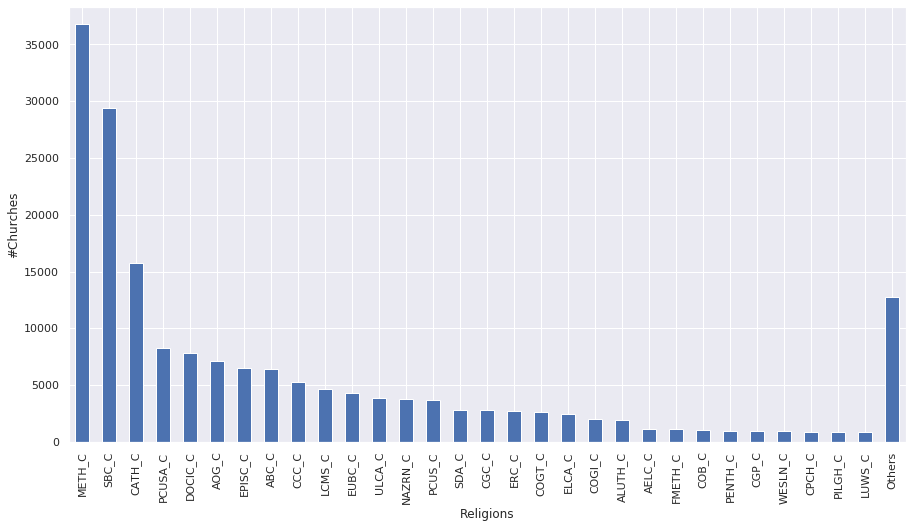

In [13]:
churches_df = get_barplot(df, '_C', '#Churches')

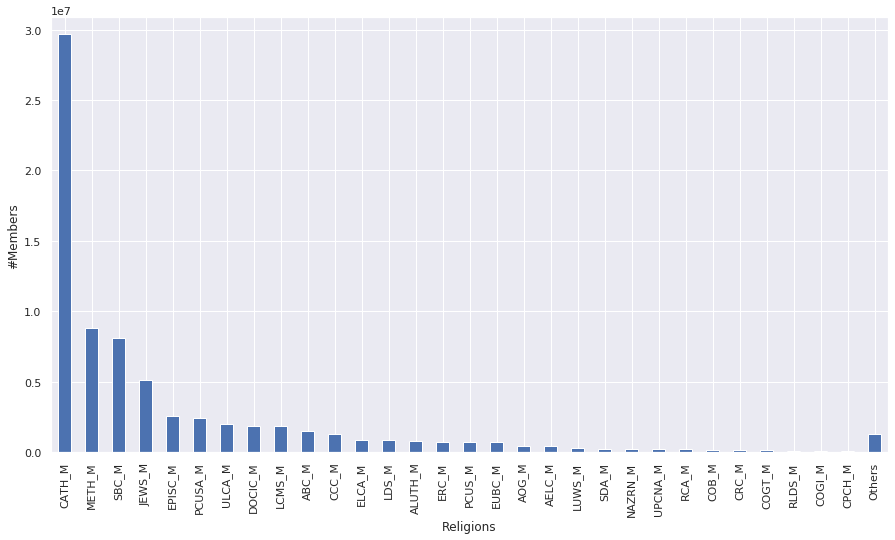

In [14]:
members_df = get_barplot(df, '_M', '#Members')

###  2) Highest per person ratio of Orthodox Christian members

ARAPO_M -> Armenian Apostolic Orthodox Church of America  
GRKAD_M -> Greek Orthodox Archdiocese of North and South America    
ACROC_M -> American Carpatho-Russian Orthodox Greek Catholic Church  
BEOC_M  -> Bulgarian Eastern Orthodox Church  

In [15]:
orthodox = df[['CNAME']]
orthodox['TOT_ORTHDX'] = df['ARAPO_M'] + df['GRKAD_M'] + df['ACROC_M'] + df['BEOC_M']
orthodox['RATIO'] = orthodox['TOT_ORTHDX'] / df['TOTMEMB']

/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
orthodox.sort_values(by=['RATIO'], ascending=False)

,CNAME,TOT_ORTHDX,RATIO
164,"Cherokee, AL",200,0.021827
133,"Fresno, CA",629,0.006071
618,"Madison, IL",420,0.005222
1207,"Calhoun, MI",150,0.005141
3030,"Racine, WI",213,0.003233
...,...,...,...
1618,"Yellowstone National Park (part), MT",0,NaN
2326,"Armstrong, SC",0,NaN
2639,"Loving, TX",0,NaN
2747,"Daggett, UT",0,NaN


In [17]:
orthodox.nlargest(10, 'RATIO')

,CNAME,TOT_ORTHDX,RATIO
164,"Cherokee, AL",200,0.021827
133,"Fresno, CA",629,0.006071
618,"Madison, IL",420,0.005222
1207,"Calhoun, MI",150,0.005141
3030,"Racine, WI",213,0.003233
2053,"Lorain, OH",200,0.002689
1219,"Genesee, MI",200,0.002397
662,"Allen, IN",250,0.002389
2278,"Providence, RI",997,0.002225
1833,"Rensselaer, NY",172,0.002169


### 3) 3 outlier counties with respect to the distribution of their churches across religions

/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


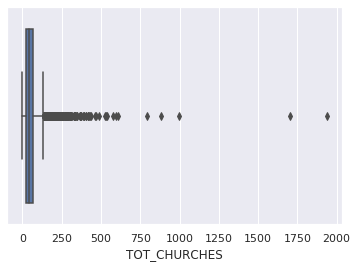

In [18]:
# sub_df_['TOT_CHURCH']= 
sub_df_ = df[['CNAME']]
sub_df_['TOT_CHURCHES'] = df.loc[:, df.columns.str.endswith('_C')].sum(axis=1)

sns.boxplot(x=sub_df_['TOT_CHURCHES'])

In [19]:
sub_df_

,CNAME,TOT_CHURCHES
0,"Hale, AL",52
1,"Henry, AL",31
2,"Houston, AL",88
3,"Jackson, AL",82
4,"Jefferson, AL",595
...,...,...
3070,"Teton, WY",3
3071,"Uinta, WY",8
3072,"Washakie, WY",15
3073,"Weston, WY",13


In [20]:
sub_df_[(np.abs(stats.zscore(sub_df_['TOT_CHURCHES'])) > 11)]

,CNAME,TOT_CHURCHES
172,"Los Angeles, CA",1937
574,"Cook, IL",1700
2209,"Allegheny, PA",997


In [21]:
qq = 0.0009
QQ = 1 - qq
df_qq = sub_df_[~sub_df_['TOT_CHURCHES'].between(sub_df_['TOT_CHURCHES'].quantile(qq), sub_df_['TOT_CHURCHES'].quantile(QQ))]

In [22]:
df_qq

,CNAME,TOT_CHURCHES
172,"Los Angeles, CA",1937
574,"Cook, IL",1700
2209,"Allegheny, PA",997


### 4) Where would you create a cross-religion centre of discussion between religions to maximize its impact? Support the proposal based on data analysis results.

In [23]:

memb_df = df[['CNAME', 'TOTMEMB']]
memb_df['SD'] = df.loc[:, df.columns.str.endswith('_M')].std(axis=1)
memb_df['func'] = memb_df['SD'] * memb_df['TOTMEMB']**(1/2)

/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
memb_df.sort_values(by=['func'], ascending=False).head(10)

,CNAME,TOTMEMB,SD,func
574,"Cook, IL",2684669,167322.870519,2.741578e+08
1815,"Kings, NY",1871690,117975.301145,1.614017e+08
172,"Los Angeles, CA",1822436,85902.273625,1.159660e+08
1276,"Wayne, MI",1144245,71604.216260,7.659459e+07
2258,"Philadelphia, PA",1207043,69103.858313,7.592131e+07
1794,"Bronx, NY",1050813,66737.240023,6.841179e+07
1822,"New York, NY",972262,54459.467292,5.369886e+07
2209,"Allegheny, PA",944319,53958.863318,5.243511e+07
1832,"Queens, NY",921106,54071.531022,5.189476e+07
1189,"Middlesex, MA",671741,48346.113746,3.962438e+07


In [25]:
df.loc[memb_df['func'] >= 1000]

,CaseID$,CNAME,STCODE,CCODE,TOTPOP,TOTMEMB,TOTCHUR,SDA_M,SDA_C,AOG_M,...,UCHRC_M,UCHRC_C,UCA_M,UCA_C,VEDS_M,VEDS_C,VLNTR_M,VLNTR_C,CGP_M,CGP_C
0,33,"Hale, AL",1,65,20832,5145,52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,"Henry, AL",1,67,18674,4773,31,0,0,23,...,0,0,0,0,0,0,0,0,0,0
2,35,"Houston, AL",1,69,46522,19420,88,87,2,379,...,0,0,0,0,0,0,0,0,0,0
3,36,"Jackson, AL",1,71,38998,9030,82,110,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,"Jefferson, AL",1,73,558928,212326,595,991,4,648,...,0,0,0,0,0,0,0,0,454,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,3070,"Sweetwater, WY",56,37,22017,17771,22,57,1,97,...,0,0,0,0,0,0,0,0,0,0
3070,3071,"Teton, WY",56,39,2593,968,3,0,0,10,...,0,0,0,0,0,0,0,0,0,0
3071,3072,"Uinta, WY",56,41,7331,3817,8,0,0,5,...,0,0,0,0,0,0,0,0,0,0
3072,3073,"Washakie, WY",56,43,7252,2378,15,70,3,90,...,0,0,0,0,0,0,0,0,0,0
